In [15]:
import pandas as pd
from cmath import sqrt
import numpy as np
import matplotlib.pyplot as plt

dataset_path = './data/v1_world-happiness-report-2017.csv'
dataset_path1 = './data/v2_world-happiness-report-2017.csv'
dataset_path2 = './data/v3_world-happiness-report-2017.csv'
def read_dataset(path):
    df = pd.read_csv(path)
    return df

# Matrix

In [4]:
def get_transpose_matrix(matrix):
    transpose = [[0] * len(matrix) for _ in range(len(matrix[0]))]
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            transpose[j][i] = matrix[i][j]
    return transpose

def get_determinant_matrix(matrix):
    if len(matrix) == 2 and len(matrix[0]) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    
    det = 0
    for count in range(len(matrix)):
        det += (((-1) ** count) * matrix[0][count] * 
                get_determinant_matrix(
                    [x[:count] + x[count + 1:] for x in matrix[1:]])
                )
    
    return det


def get_inverse_matrix(matrix):
    det = get_determinant_matrix(matrix)
    if det == 0:
        return None
    if len(matrix) != len(matrix[0]):
        return None
    
    if len(matrix) == 2:
        return [
            [matrix[1][1] / det, -1 * matrix[0][1] / det],
            [-1 * matrix[1][0] / det, matrix[0][0] / det]
        ]
    
    inverse = [[0] * len(matrix) for _ in range(len(matrix[0]))]
    for row in range(len(matrix)):
        for col in range(len(matrix)):
            inverse[row][col] += (((-1) ** (row + col)) * 
                                  get_determinant_matrix(
                                      [[matrix[i][j] for j in range(len(matrix)) if j != col]
                                                    for i in range(len(matrix)) if i != row]
                                    )
                                  )
    inverse = get_transpose_matrix(inverse)
    return [
        [y / det for y in row] for row in inverse
    ]

def get_produce_matrix(matrix1, matrix2):
    if len(matrix1[0]) != len(matrix2):
        return None
    
    produce = [[0] * len(matrix2[0]) for _ in range(len(matrix1))]
    for row in range(len(matrix1)):
        for col1 in range(len(matrix2[0])):
            for col2 in range(len(matrix1[0])):
                produce[row][col1] += matrix1[row][col2] * matrix2[col2][col1]
                
    return produce

# Train test split function

In [5]:
def train_test_split(set1, set2, test_size):
    
    np.random.seed(42)
    indices = np.arange(len(set1))
    np.random.shuffle(indices)
    
    test_indices = indices[:int(test_size * len(set1))]
    train_indices = indices[int(test_size * len(set1)):]
    
    return set1.iloc[train_indices], set1.iloc[test_indices], set2.iloc[train_indices], set2.iloc[test_indices]
    

# Linear regression functions

In [6]:
def get_linear_regression(dataset, input_cols, output_col):
    dataset = dataset.dropna(subset=input_cols)
    
    x_train, x_test, y_train, y_test = train_test_split(dataset[input_cols], dataset[output_col], test_size= 0.35)
    
    predictions = []
    ww = []
    
    if len(input_cols) == 1:
        x = x_train[input_cols[0]].values 
        y = y_train.values   
        
        w1 = (len(x) * sum(x * y) - sum(x) * sum(y)) / (len(x) * sum(x ** 2) - sum(x) ** 2)
        w0 = (sum(y) - w1 * sum(x)) / len(x)
        
        predictions = [w0 + w1 * value for value in x_test[input_cols[0]].values]
        
        plt.plot(x_test, y_test, 'yo', label = 'Actual')
        plt.plot(x_test, predictions, 'g^', label = "Predicted")
        plt.title('computed validation and real validation data')
        plt.xlabel(", ".join(input_cols))
        plt.ylabel(output_col)
        plt.legend()
        plt.show()
        
        ww = [w0, w1]
    else:
        x_train_bias = [[1] + list(row) for row in x_train.values]
        ww = get_produce_matrix(
                get_produce_matrix(
                    get_inverse_matrix(
                        get_produce_matrix(
                            get_transpose_matrix(x_train_bias), 
                            x_train_bias)), 
                    get_transpose_matrix(x_train_bias)), 
                [[y] for y in y_train])
    
    if len(input_cols) == 2:
        predictions =  [ww[0][0] + ww[1][0] * x[0] + ww[2][0] * x[1] for x in [list(xx) for xx in x_test.values]]
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x_test[input_cols[0]], x_test[input_cols[1]], y_test, c='purple', label='Actual')
        ax.scatter(x_test[input_cols[0]], x_test[input_cols[1]], predictions, c='yellow', marker='^',label='Predicted')
        ax.set_xlabel(input_cols[0])
        ax.set_ylabel(input_cols[1])
        ax.set_zlabel(output_col)
        ax.set_title('computed validation and real validation data')
        ax.legend()
        plt.show()
        
    print(f"Mean squared error: {sum([(a - p) ** 2 for a, p in zip(y_test, predictions)]) / len(predictions)}")
    print(f"Root mean squared error: {sqrt(sum([(a - p) ** 2 for a, p in zip(y_test, predictions)]) / len(predictions))}")
    return ww
        
    

# Predict happiness based on GDP per Capita

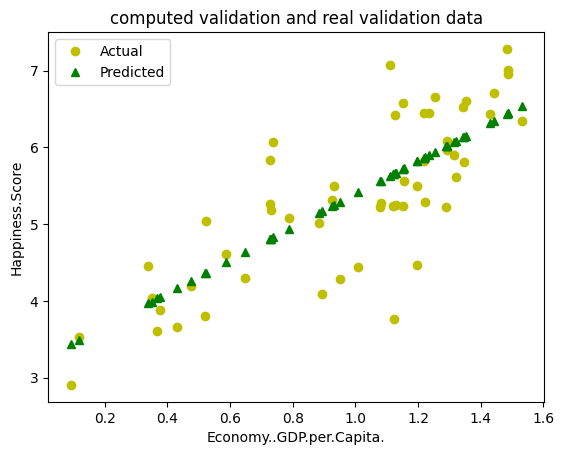

Mean squared error: 0.40958441213335456
Root mean squared error: (0.6399878218633184+0j)


In [22]:
ww_ = get_linear_regression(read_dataset(dataset_path), ['Economy..GDP.per.Capita.'], 'Happiness.Score')

def run_model():
    gdp_capita = int(input("Enter GDP per Capita: "))    
    print(f"Prediction (GPD per Capita = {gdp_capita}):")
    print(f"Happiness = {ww_[0] + ww_[1] * gdp_capita}")


# Predict happiness based on family

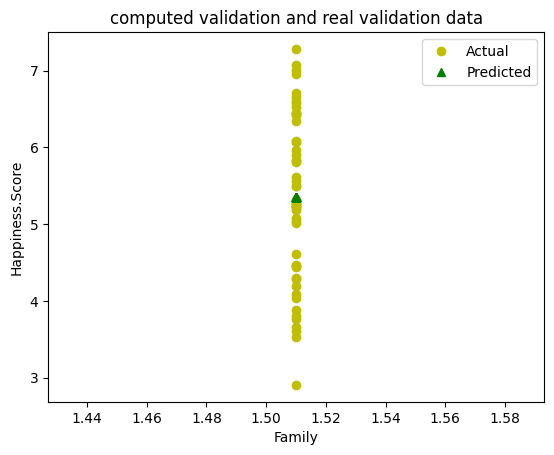

Mean squared error: 1.1286077081848986
Root mean squared error: (1.0623595004445994+0j)


In [21]:
model_family = get_linear_regression(read_dataset(dataset_path), ['Family'], 'Happiness.Score')


# Predict happiness based on GDP per Capita and freedom

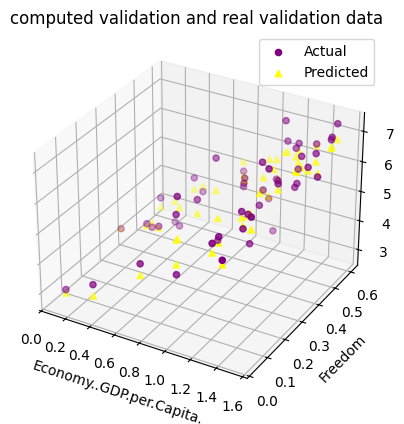

Mean squared error: 0.35423939378996044
Root mean squared error: (0.595180135580784+0j)


[[np.float64(2.455919245521133)],
 [np.float64(1.842487083765567)],
 [np.float64(2.6200993874753538)]]

In [20]:
get_linear_regression(read_dataset(dataset_path), ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')
